<a href="https://colab.research.google.com/github/Meave0108/my_work-python-/blob/master/python_HW0401.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


## 讀入資料__fashion


In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## 數據集內容


#### Labels

* T-shirt/top -->0
* Trouser -->1
* Pullover -->2
* Dress -->3
* Coat -->4
* Sandal -->5
* Shirt -->6
* Sneaker -->7
* Bag -->8
* Ankle boot -->9






In [0]:
names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [0]:
len(x_train)

60000

In [0]:
len(x_test)

10000

正確答案 Pullover


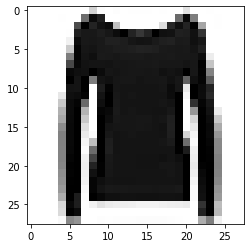

In [0]:
n=1122
plt.imshow(x_train[n],cmap='Greys')
print('正確答案',names[y_train[n]])

### 3.資料整理


##### #CNN分析的輸入矩陣須為一個channel(多channel可能表示彩色圖片(eg.channel1-->red, channel2-->blue)),故(28,28)-->(28,28,1)





In [0]:
x_train=x_train.reshape(60000,28,28,1)/255

In [0]:
x_test=x_test.reshape(10000,28,28,1)/255

In [0]:
x_train[1234].shape

(28, 28, 1)

In [0]:
y_train[1234]

8

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

### 4.打造神經網路(CNN)

In [0]:
###filter 一般來說都為奇數(3x3)
###CNN必須為扁平的-->flatten

In [0]:
###讀入必要的函式

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D ##2D-->
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import SGD
import tensorflow.keras.activations

In [0]:
model=Sequential()  #開空的函數學習機

##### 1.卷積層輸出維度-->32,64,128
##### 2.filter大小-->(7,7)
##### 3.激活函數改用Leaky ReLU






In [0]:
lrelu = lambda x: tensorflow.keras.activations.relu(x, alpha=0.1)

model.add(Conv2D(32,(7,7),padding='same',input_shape=(28,28,1),activation=lrelu))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(64,(7,7),padding='same',activation=lrelu))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(128,(7,7),padding='same',activation=lrelu))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Flatten())

##### 兩個隱藏層，一個輸出層

In [0]:
model.add(Dense(200, activation=lrelu)) 

In [0]:
model.add(Dense(80,activation=lrelu)) 

In [0]:
model.add(Dense(10,activation='softmax')) ##softmax-->輸出的10個數字加起來要等於1

### 5.組裝我們的神經網路

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        1600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        100416    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         401536    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [0]:
model.compile(loss='mse',optimizer=SGD(lr=0.087),metrics=['accuracy'])  ##將mse改成mae

### 6.訓練神經網路

In [0]:
model.fit(x_train,y_train,batch_size=120,epochs=20)

Epoch 1/20
500/500 [==============================] - 6s 12ms/step - loss: 0.0868 - accuracy: 0.2600
Epoch 2/20
500/500 [==============================] - 6s 12ms/step - loss: 0.0493 - accuracy: 0.6385
Epoch 3/20
500/500 [==============================] - 6s 12ms/step - loss: 0.0379 - accuracy: 0.7239
Epoch 4/20
500/500 [==============================] - 6s 12ms/step - loss: 0.0336 - accuracy: 0.7610
Epoch 5/20
500/500 [==============================] - 6s 12ms/step - loss: 0.0312 - accuracy: 0.7812
Epoch 6/20
500/500 [==============================] - 6s 12ms/step - loss: 0.0292 - accuracy: 0.7967
Epoch 7/20
500/500 [==============================] - 6s 12ms/step - loss: 0.0277 - accuracy: 0.8067
Epoch 8/20
500/500 [==============================] - 6s 12ms/step - loss: 0.0263 - accuracy: 0.8177
Epoch 9/20
500/500 [==============================] - 6s 12ms/step - loss: 0.0253 - accuracy: 0.8250
Epoch 10/20
500/500 [==============================] - 6s 12ms/step - loss: 0.0241 - accura

### 7.訓練成果

In [0]:
result=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
def my_predict(n):
  print('預測結果',names[result[n]])
  X=x_test[n].reshape(28,28)##因前面為了訓練將矩陣改成(28,28,1)，在這邊要改回來
  plt.imshow(X,cmap='Greys') 

In [0]:
from ipywidgets import interact_manual

In [0]:
interact_manual(my_predict,n=(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict>

### 檢查是否有overfitting的狀況

In [0]:
loss,accuracy = model.evaluate(x_test, y_test)
print('\nresult')
print(f'loss：{loss}\nacccuracy: {accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0195 - accuracy: 0.8669

result
loss：0.019547466188669205
acccuracy: 0.8669000267982483


### 利用混淆矩陣看預測準確度

In [0]:
from sklearn.metrics import confusion_matrix
b=model.predict(x_test)
y_test_classes = np.argmax(y_test,axis=1)
y_pred_classes = np.argmax(b,axis=1)
print (confusion_matrix(y_test_classes,y_pred_classes))

[[882   2  16  16   6   3  58   0  17   0]
 [  2 970   1  18   4   0   4   0   1   0]
 [ 18   2 795   6 120   2  43   0  14   0]
 [ 46  17  17 837  45   1  29   0   8   0]
 [  3   1  95  16 824   1  52   0   8   0]
 [  1   0   0   0   0 961   0  27   1  10]
 [214   2 111  17  92   0 543   0  21   0]
 [  0   0   0   0   0  27   0 937   0  36]
 [  1   1   8   4   5   3   3   4 970   1]
 [  0   0   0   0   0  13   0  36   1 950]]
